In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import matplotlib.pyplot as plt


sns.set_theme(style='whitegrid')
plt.style.use('default')

In [4]:
# Load 0-shot results
with open("../results/results_0shot_20251212_063302.json", "r", encoding="utf-8") as f:
    data = json.load(f)

zero_shot = pd.DataFrame(data)

zero_shot.head()

,idx,level,valid,label,time,ttc,prompt,thoughts,answer
0,8,3,True,OPTIMAL,16.839130,1703,You have to solve the following 6x6 Rush Hour ...,"**Rush Hour Solution Process**\n\nOkay, so the...","[{'name': 'B', 'direction': 'left', 'distance'..."
1,7,3,True,OPTIMAL,27.486174,3136,You have to solve the following 6x6 Rush Hour ...,"**Okay, here's my thought process:** The user ...","[{'name': 'B', 'direction': 'left', 'distance'..."
2,0,3,True,OPTIMAL,32.333857,3861,You have to solve the following 6x6 Rush Hour ...,**Analysis and Solution for 6x6 Rush Hour Puzz...,"[{'name': 'B', 'direction': 'left', 'distance'..."
3,1,3,True,OPTIMAL,34.375154,4368,You have to solve the following 6x6 Rush Hour ...,"**Final Rush Hour Puzzle Solution**\n\nOkay, h...","[{'name': 'B', 'direction': 'left', 'distance'..."
4,9,3,True,OPTIMAL,36.560226,4243,You have to solve the following 6x6 Rush Hour ...,**My Approach to the Rush Hour Puzzle**\n\nOka...,"[{'name': 'C', 'direction': 'left', 'distance'..."


In [5]:
# Load 3-shot results
with open("../results/results_3shot_20251212_191639.json", "r", encoding="utf-8") as f:
    data = json.load(f)

few_shots = pd.DataFrame(data)

few_shots.head()

,idx,level,valid,label,time,ttc,prompt,thoughts,answer
0,24,3,True,OPTIMAL,23.883954,2921,You have to solve the following 6x6 Rush Hour ...,**Initial Assessment and Problem Decomposition...,"[{'name': 'B', 'direction': 'left', 'distance'..."
1,27,3,False,INVALID_MOVE,24.873258,3099,You have to solve the following 6x6 Rush Hour ...,"**Alright, here's the breakdown of my thought ...","[{'name': 'D', 'direction': 'down', 'distance'..."
2,21,3,True,OPTIMAL,26.594612,3341,You have to solve the following 6x6 Rush Hour ...,"**Alright, here's the breakdown of my thought ...","[{'name': 'C', 'direction': 'left', 'distance'..."
3,14,3,True,OPTIMAL,35.590583,4977,You have to solve the following 6x6 Rush Hour ...,"**The Rush Hour Solution**\n\nOkay, so I'm loo...","[{'name': 'B', 'direction': 'left', 'distance'..."
4,15,3,True,OPTIMAL,38.530205,4951,You have to solve the following 6x6 Rush Hour ...,**Initial Assessment and Problem Decomposition...,"[{'name': 'B', 'direction': 'right', 'distance..."


In [6]:
# Load augmented results
with open("../results/results_0shot_20251213_174024.json", "r", encoding="utf-8") as f:
    data = json.load(f)

augmented = pd.DataFrame(data)

augmented.head()

,idx,level,valid,label,time,ttc,prompt,thoughts,answer
0,28,3,True,NOT_OPTIMAL,26.823152,2581,You are solving a Rush Hour puzzle on a 6x6 gr...,**Rush Hour Puzzle Solution: Thoughts and Proc...,"```python\n{\n ""steps"": [\n {\n ..."
1,21,3,True,NOT_OPTIMAL,44.304009,5470,You are solving a Rush Hour puzzle on a 6x6 gr...,**Initial Assessment and Problem Breakdown**\n...,"```python\n{\n""steps"": [\n{\n""move"": {""name"": ..."
2,30,3,True,NOT_OPTIMAL,44.311122,5534,You are solving a Rush Hour puzzle on a 6x6 gr...,**Solution Generation for Rush Hour Puzzle**\n...,"```python\n{\n ""steps"": [\n {\n ..."
3,25,3,True,NOT_OPTIMAL,45.289213,5509,You are solving a Rush Hour puzzle on a 6x6 gr...,"**Solving the Rush Hour Puzzle**\n\nOkay, here...","```python\n{\n ""steps"": [\n {\n ..."
4,15,3,True,OPTIMAL,47.648533,6202,You are solving a Rush Hour puzzle on a 6x6 gr...,**Solution Generation for Rush Hour Puzzle**\n...,"```python\n{\n ""steps"": [\n {\n ..."


In [15]:
levels = list(range(3, 21))

df_augmented = augmented[augmented["level"].between(3, 20)]
df_0sp = zero_shot[zero_shot["level"].between(3, 20)]
df_fsp = few_shots[few_shots["level"].between(3, 20)]

In [ ]:
# Compute average token counts

sr_0sp = df_0sp.groupby("level")["ttc"].mean()
sr_0sp = sr_0sp.reindex(levels)

sr_fsp = df_fsp.groupby("level")["ttc"].mean()
sr_fsp = sr_fsp.reindex(levels)

sr_augmented = df_augmented.groupby("level")["ttc"].mean()
sr_augmented = sr_augmented.reindex(levels)

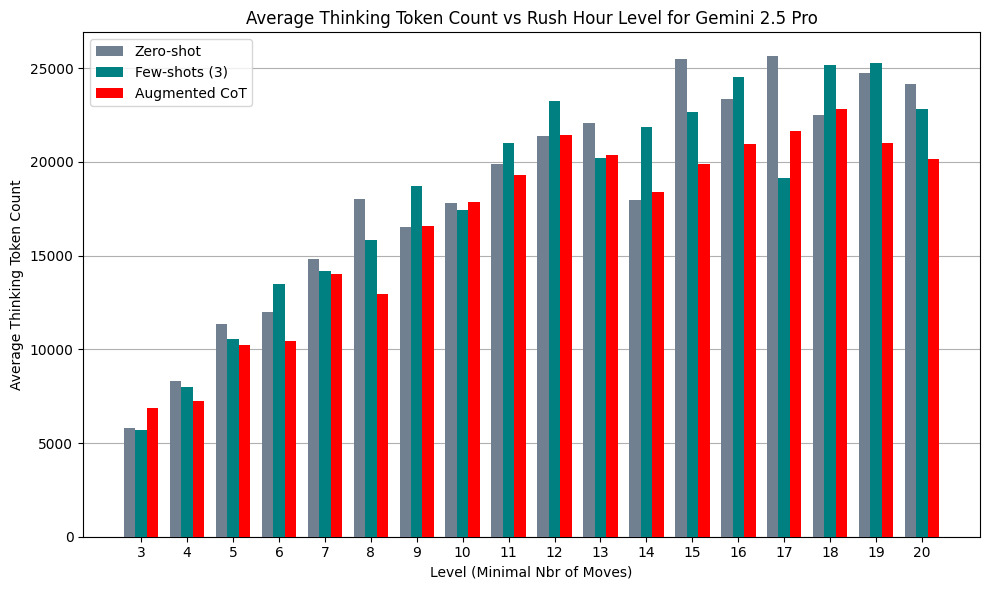

In [24]:
plt.figure(figsize=(10, 6))

width = 0.25  # the width of the bars
x = range(len(levels))

plt.bar([i - width for i in x], sr_0sp, width, label='Zero-shot', color='slategray', zorder=3)
plt.bar(x, sr_fsp, width, label='Few-shots (3)', color='teal', zorder=3)
plt.bar([i + width for i in x], sr_augmented, width, label='Augmented CoT', color='red', zorder=3)

plt.xlabel("Level (Minimal Nbr of Moves)")
plt.ylabel("Average Thinking Token Count")
plt.title("Average Thinking Token Count vs Rush Hour Level for Gemini 2.5 Pro")
# xticks labels must be strings for the type-checked API; convert levels (ints) to strings
plt.xticks(x, [str(l) for l in levels])
plt.legend()
plt.grid(axis='y', zorder=0)
plt.tight_layout()

plt.show()

In [22]:
# Compute average token counts (approximated from answer length)

# A common heuristic is that 1 token ~= 4 characters
def estimate_tokens(text):
    if pd.isna(text):
        return 0
    return len(str(text)) / 4

sr_0sp_approx = df_0sp["answer"].apply(estimate_tokens).groupby(df_0sp["level"]).mean()
sr_0sp_approx = sr_0sp_approx.reindex(levels)

sr_fsp_approx = df_fsp["answer"].apply(estimate_tokens).groupby(df_fsp["level"]).mean()
sr_fsp_approx = sr_fsp_approx.reindex(levels)

sr_augmented_approx = df_augmented["answer"].apply(estimate_tokens).groupby(df_augmented["level"]).mean()
sr_augmented_approx = sr_augmented_approx.reindex(levels)

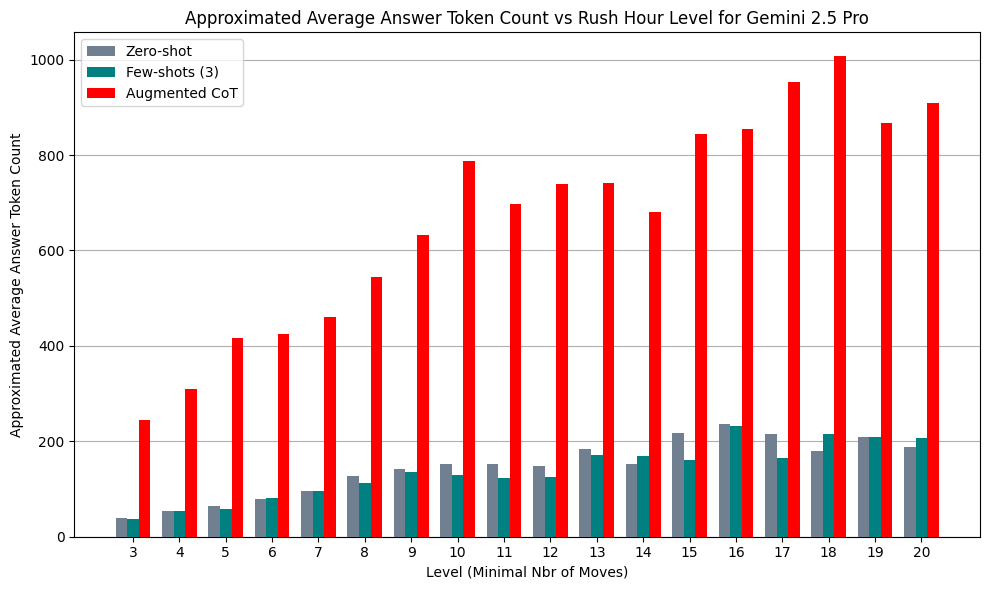

In [26]:
plt.figure(figsize=(10, 6))

width = 0.25  # the width of the bars
x = range(len(levels))

plt.bar([i - width for i in x], sr_0sp_approx, width, label='Zero-shot', color='slategray', zorder=3)
plt.bar(x, sr_fsp_approx, width, label='Few-shots (3)', color='teal', zorder=3)
plt.bar([i + width for i in x], sr_augmented_approx, width, label='Augmented CoT', color='red', zorder=3)

plt.xlabel("Level (Minimal Nbr of Moves)")
plt.ylabel("Approximated Average Answer Token Count")
plt.title("Approximated Average Answer Token Count vs Rush Hour Level for Gemini 2.5 Pro")
# xticks labels must be strings for the type-checked API; convert levels (ints) to strings
plt.xticks(x, [str(l) for l in levels])
plt.legend()
plt.grid(axis='y', zorder=0)
plt.tight_layout()

plt.show()